In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy
from scipy import linalg as LA2
from sklearn.neighbors import NearestNeighbors as kNN
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
x, group = np.loadtxt('NormalSample.csv', delimiter = ',', unpack = True)
print(x)
print(iqr(x))
h = (2*iqr(x))/np.cbrt(x.size)
print("h = ",h)

[50.91 50.03 50.93 49.67 49.73 50.67 51.28 51.37 49.06 48.27 51.11 50.96
 49.56 49.84 49.67 50.03 51.01 49.49 49.67 50.18 50.97 49.9  49.82 51.09
 51.11 49.05 50.11 51.41 48.63 51.51 49.4  48.79 49.88 49.78 50.26 51.36
 50.11 50.74 50.64 48.84 49.55 50.25 49.64 49.59 49.86 51.58 50.96 50.19
 51.37 49.53 51.51 48.41 50.7  49.31 50.22 49.8  51.82 49.38 50.36 50.61
 50.25 48.36 49.97 50.6  51.72 49.24 48.17 51.71 50.47 49.98 48.57 50.84
 51.07 49.61 49.28 51.58 50.49 51.49 49.33 47.82 49.24 49.3  49.93 51.25
 50.07 48.9  48.59 49.96 51.94 49.35 49.17 50.93 49.91 49.54 49.29 49.23
 50.9  50.22 50.29 50.79]
1.447499999999998
h =  0.6237088427642294


In [11]:
u = np.log10(h)
v = np.sign(u) * math.ceil(abs(u))
h = np.power(10,v)
print(h)

0.1

[0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.08, 0.12, 0.3, 0.46, 0.32, 0.3, 0.24, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.01, 0.1, 0.38, 0.31, 0.2, 0.0, 0.0, 0.0]
[0.0, 0.055, 0.345, 0.1, 0.0]


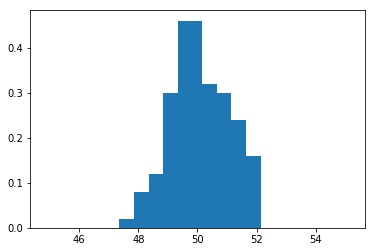

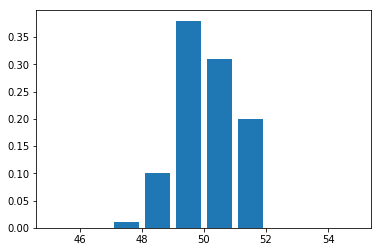

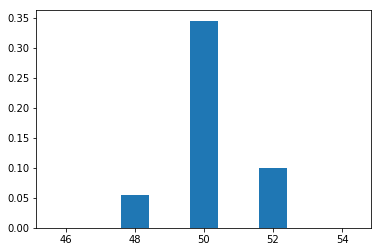

In [12]:
N  = x.size
h = 0.5


        
def find_density_estimates(x,h):
    min = 45
    max = 55
    mid_points = [min+h/2]
    for i in range(1,x.size):
        if(mid_points[i-1]+h <= max):
            mid_points.append(mid_points[i-1]+h)
            #print(mid_points[i])
        else: break
        
    p = []
    for i in range(len(mid_points)):
        w_sum = 0
        u = []
        w = []
        for j in range(x.size):
            u.append((x[j] - mid_points[i])/h)            
            if(u[j]>-0.5 and u[j] <= 0.5):
                w.append(1)
            else:
                w.append(0)
            w_sum = w_sum + w[j]
        #print(w_sum)
        p.append(w_sum / (x.size*h))
        del u
        del w
    return p, mid_points

p, mid_points = find_density_estimates(x,h)
print(p)
a = plt.figure(1)
plt.bar(mid_points,p)
a.show
del p

h = 1
p, mid_points = find_density_estimates(x,h)
print(p)
a = plt.figure(2)
plt.bar(mid_points,p)
a.show
del p

h = 2
p, mid_points = find_density_estimates(x,h)
print(p)
a = plt.figure(3)
plt.bar(mid_points,p)
a.show
del p
del x

47.82 [49.4675 50.03   50.915 ] 51.94
47.82 49.295 50.22 50.96 51.94
48.17 49.53 49.88 50.74 51.82


c:\users\suhas\pyvenevs\fall\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


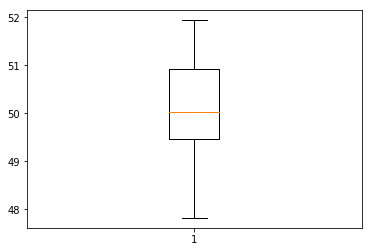

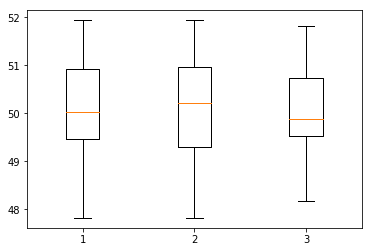

In [13]:
data = pd.read_csv("NormalSample_labelled.csv")
col_x = data.iloc[:,0]
# calculate quartiles
quartiles = np.percentile(col_x, [25, 50, 75])
# calculate min/max
data_min, data_max = col_x.min(), col_x.max()
print(data_min,quartiles,data_max)

grpBy = data.groupby('Group')
groups = [grpBy.get_group(g) for g in grpBy.groups]

g0_max = groups[0].iloc[:,0].max()
g0_min = groups[0].iloc[:,0].min()
g0_25, g0_50, g0_75 = np.percentile(groups[0].iloc[:,0], [25, 50, 75])
print(g0_min,g0_25,g0_50,g0_75,g0_max)

g1_max = groups[1].iloc[:,0].max()
g1_min = groups[1].iloc[:,0].min()
g1_25, g1_50, g1_75 = np.percentile(groups[1].iloc[:,0], [25, 50, 75])
print(g1_min,g1_25,g1_50,g1_75,g1_max)

box_fig = plt.figure(4)
plt.boxplot(col_x)
box_fig.show()

box_plot = plt.figure(5)
plt.boxplot([col_x, groups[0].iloc[:,0], groups[1].iloc[:,0]],positions = [1,2,3])
box_plot.show()

 Fraud % =  19.949664429530202
Input Matrix = 
 [[ 1100    11     0    94     1     2]
 [ 1300     7     2   122     0     1]
 [ 1500     4     0   149     1     3]
 ...
 [89200    15     0   212     0     2]
 [89800    14     0   214     0     2]
 [89900    15     0   220     0     1]]
Number of Dimensions =  2
Number of Rows =  5960
Number of Columns =  6
t(x) * x = 
 [[2812184770000    1040176400      42913200   20404919400     134771800
      220035900]
 [   1040176400        788159         23809      10264845         57654
         106717]
 [     42913200         23809          7922        448090          3459
           4765]
 [  20404919400      10264845        448090     232422585       1163391
        2121127]
 [    134771800         57654          3459       1163391         24460
          13581]
 [    220035900        106717          4765       2121127         13581
          29423]]
Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.4453913

c:\users\suhas\pyvenevs\fall\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


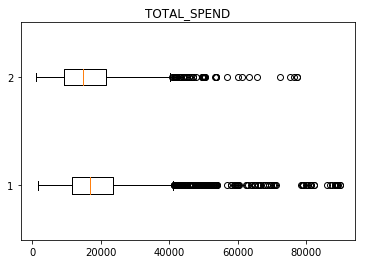

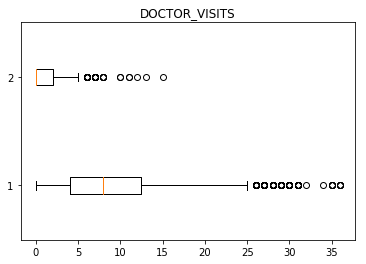

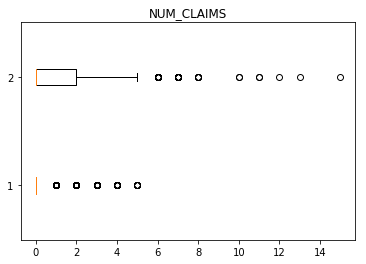

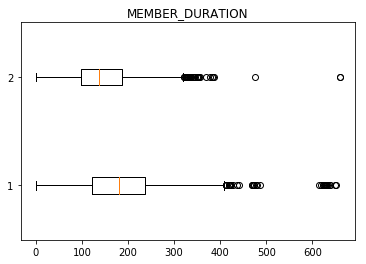

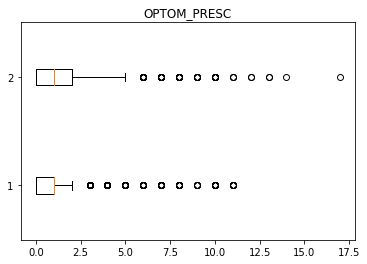

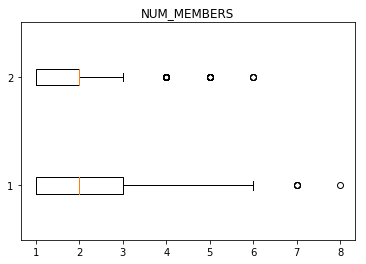

In [14]:
df = pd.read_csv('Fraud.csv')
# Input the matrix X
print(" Fraud % = ", (df.iloc[:,1].sum()/df.iloc[:,1].size)*100)
fraud_grpBy = df.groupby('FRAUD')
fraud_grps = [fraud_grpBy.get_group(g) for g in fraud_grpBy.groups]

box_plot = plt.figure(6)
plt.boxplot([fraud_grps[0].iloc[:,2],fraud_grps[1].iloc[:,2]],positions = [1,2],vert = False)
plt.title('TOTAL_SPEND')
box_plot.show()

box_plot = plt.figure(7)
plt.boxplot([fraud_grps[0].iloc[:,3],fraud_grps[1].iloc[:,4]],positions = [1,2],vert = False)
plt.title('DOCTOR_VISITS')
box_plot.show()

box_plot = plt.figure(8)
plt.boxplot([fraud_grps[0].iloc[:,4],fraud_grps[1].iloc[:,4]],positions = [1,2],vert = False)
plt.title('NUM_CLAIMS')
box_plot.show()

box_plot = plt.figure(9)
plt.boxplot([fraud_grps[0].iloc[:,5],fraud_grps[1].iloc[:,5]],positions = [1,2],vert = False)
plt.title('MEMBER_DURATION')
box_plot.show()

box_plot = plt.figure(10)
plt.boxplot([fraud_grps[0].iloc[:,6],fraud_grps[1].iloc[:,6]],positions = [1,2],vert = False)
plt.title('OPTOM_PRESC')
box_plot.show()

box_plot = plt.figure(11)
plt.boxplot([fraud_grps[0].iloc[:,7],fraud_grps[1].iloc[:,7]],positions = [1,2],vert = False)
plt.title('NUM_MEMBERS')
box_plot.show()

df_vals = df.values
x = np.delete(df_vals,[0,1],1)

print("Input Matrix = \n", x)

print("Number of Dimensions = ", x.ndim)

print("Number of Rows = ", np.size(x,0))
print("Number of Columns = ", np.size(x,1))

#xtx = x.transpose() * x
xtx = np.matmul(x.transpose(),x)
print("t(x) * x = \n", xtx)

# Eigenvalue decomposition
evals, evecs = LA.eigh(xtx)
print("Eigenvalues of x = \n", evals)
print("Eigenvectors of x = \n",evecs)

# Here is the transformation matrix
transf = evecs.dot(LA.inv(np.sqrt(np.diagflat(evals))));
print("Transformation Matrix = \n", transf)

# Here is the transformed X
#transf_x = x * transf;
transf_x = np.matmul(x,transf)
print("The Transformed x = \n", transf_x)

# Check columns of transformed X
#xtx = transf_x.transpose() * transf_x;
xtx = np.matmul(transf_x.transpose(),transf_x);
print("Expect an Identity Matrix = \n", np.round(xtx))

# Orthonormalize using the orth function 

orthx = LA2.orth(x)
print("The orthonormalize x = \n", orthx)

# Check columns of the ORTH function
check = orthx.transpose().dot(orthx)
print("Also Expect an Identity Matrix = \n", np.round(check))

In [15]:
kNNSpec = kNN(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')

#trainData = df[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS', 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]
#trainData.describe()
trainData = transf_x
# Build nearest neighbors
nbrs = kNNSpec.fit(trainData)
distances, indices = nbrs.kneighbors(trainData)

# Find the nearest neighbors of these focal observations       
#focal = [[7500, 15, 3, 127, 2, 2]]     # Mercedes-Benz_271
sample = [[7500, 15, 3, 127, 2, 2]]
#sample.reshape(1,-1)
transf_samp = np.matmul(sample,transf)

myNeighbors = nbrs.kneighbors(transf_samp, return_distance = False)
print("My Neighbors = \n", myNeighbors)

# Perform classification
target = df[['FRAUD']]


neigh = KNeighborsClassifier(n_neighbors=5 , algorithm = 'brute', metric = 'euclidean')
nbrs = neigh.fit(trainData, target)

# See the classification result
class_result = nbrs.predict(trainData)
#print(class_result)

# See the classification probabilities
#class_prob = nbrs.predict_proba(trainData)
class_prob = nbrs.predict_proba(transf_samp)
print(class_prob)

accuracy = nbrs.score(trainData, target)
print(accuracy)
print(df.iloc[588,:])
print(df.iloc[2897,:])
print(df.iloc[1199,:])
print(df.iloc[1246,:])
print(df.iloc[886,:])

My Neighbors = 
 [[ 588 2897 1199 1246  886]]


c:\users\suhas\pyvenevs\fall\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[0. 1.]]
0.8778523489932886
CASE_ID             589
FRAUD                 1
TOTAL_SPEND        7500
DOCTOR_VISITS        15
NUM_CLAIMS            3
MEMBER_DURATION     127
OPTOM_PRESC           2
NUM_MEMBERS           2
Name: 588, dtype: int64
CASE_ID             2898
FRAUD                  1
TOTAL_SPEND        16000
DOCTOR_VISITS         18
NUM_CLAIMS             3
MEMBER_DURATION      146
OPTOM_PRESC            3
NUM_MEMBERS            2
Name: 2897, dtype: int64
CASE_ID             1200
FRAUD                  1
TOTAL_SPEND        10000
DOCTOR_VISITS         16
NUM_CLAIMS             3
MEMBER_DURATION      124
OPTOM_PRESC            2
NUM_MEMBERS            1
Name: 1199, dtype: int64
CASE_ID             1247
FRAUD                  1
TOTAL_SPEND        10200
DOCTOR_VISITS         13
NUM_CLAIMS             3
MEMBER_DURATION      119
OPTOM_PRESC            2
NUM_MEMBERS            3
Name: 1246, dtype: int64
CASE_ID             887
FRAUD                 1
TOTAL_SPEND        8900
DOCTOR_V